In [60]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from PIL import Image

from skimage.morphology import (square, rectangle, diamond, disk, cube,
                                octahedron, ball, octagon, star,
                                binary_erosion, binary_dilation, binary_opening, binary_closing,
                               remove_small_holes, label, convex_hull_image, skeletonize, thin, reconstruction,
                               opening, closing, dilation, erosion)

from skimage import data
from skimage.util import invert
from skimage import data, util, exposure, color
from scipy.ndimage import convolve, correlate, uniform_filter, gaussian_filter, median_filter, rotate 
from scipy.ndimage import prewitt, sobel, laplace

from skimage import filters
from skimage import feature

# LABORATORIO 3

## Apartado 1

formato: TIFF
(ancho, alto) = (600, 600)
modo:  L


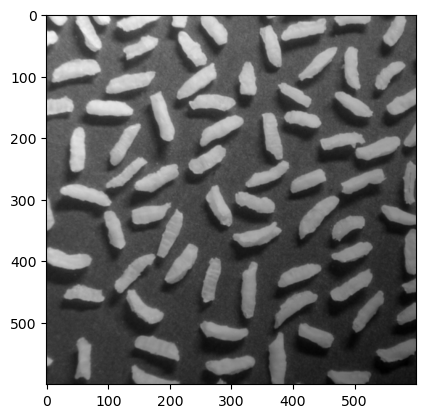

In [25]:
file = 'images/riceBGgradient.tif'
imgArroz  = Image.open(file)

print('formato:', imgArroz.format)
print('(ancho, alto) =', imgArroz.size)
print('modo: ', imgArroz.mode)

imgArroz = np.array(imgArroz)

plt.imshow(imgArroz, cmap='gray')

## Apartado 2

Vamos a intentar separar los granos de arroz del fondo a pelo, como lo haríamos en las primeras prácticas sin saber nada de morfología matemática. 

Primero visualizamos el histograma y vemos por donde podriamos cortar.

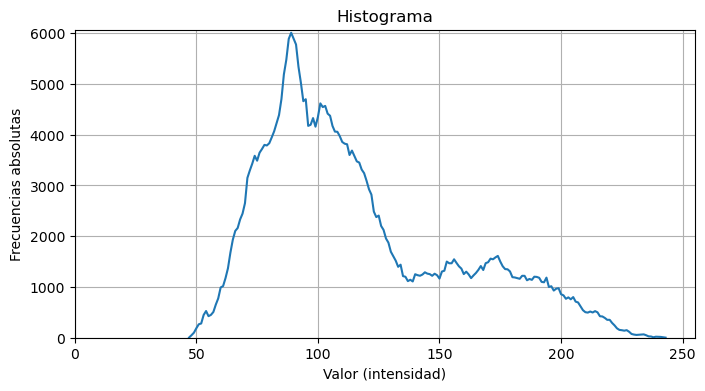

In [50]:
plt.figure(figsize=(8, 4))

img_hist, bins = exposure.histogram(imgArroz, normalize=False)
plt.plot(bins, img_hist)
plt.axis([0,255, 0, 1.01*img_hist.max()])
plt.title('Histograma')
plt.xlabel('Valor (intensidad)')
plt.ylabel('Frecuencias absolutas')
plt.grid()

In [46]:
imagenGranos = np.copy(imgArroz)

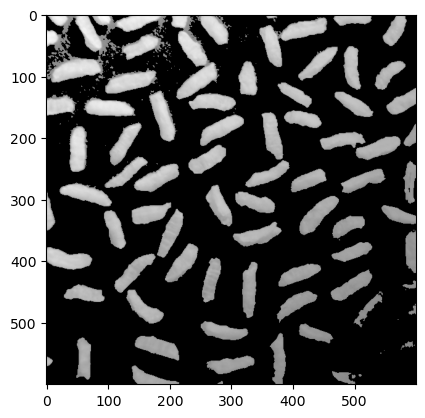

In [48]:
th = 130

mask = imagenGranos < th
imagenGranos[mask] = 0
plt.imshow(imagenGranos, cmap='gray')

Hemos ido probando valores para el umbral de 80, 100, 120... Hasta lelgar a 130, donde vemos que, todavía no se ha eliminado el fondo del todo y ya se empiezan a borrar algunos granos. Por tanto, podemos concluir que con este método tan simple, no podemos aislar los granos, necesitariamos algo más.

## Apartado 3

Como vemos que el fondo tiene distintas intesidades dependiendo de la parte de la foto en la que nos fijemos, vamos a intentar igualar el fondo para poder eliminarlo homogéneamente. Para ello vamos a aplicar una transformación Top-Hat.

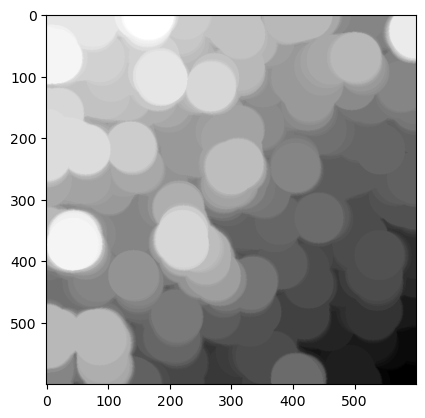

In [18]:
fondo = opening(imgArroz, disk(40))
plt.imshow(fondo, cmap='gray')

Text(0.5, 1.0, 'Imagen transformada')

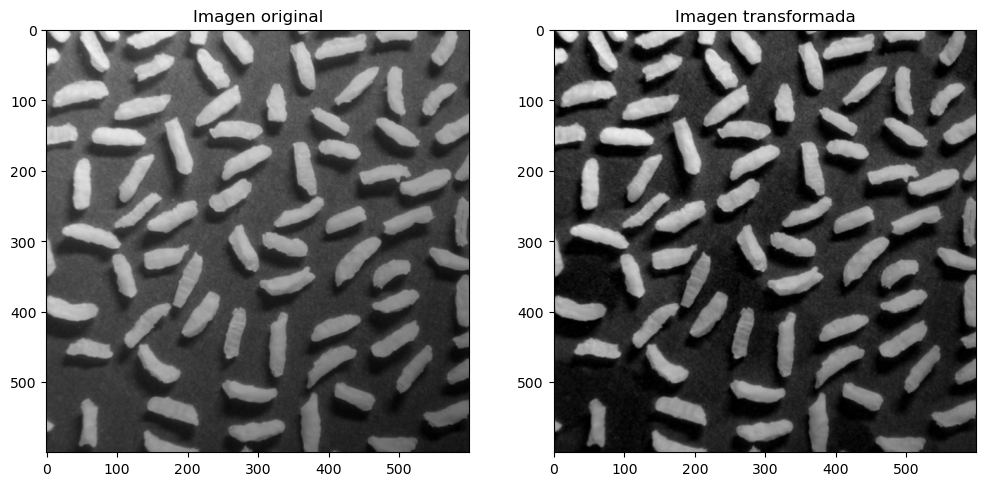

In [49]:
imagenFondoHomogeneo = imgArroz-fondo

plt.figure(figsize = (12,8))

plt.subplot(121)
plt.imshow(imgArroz, cmap='gray')
plt.title('Imagen original')

plt.subplot(122)
plt.imshow(imagenFondoHomogeneo, cmap='gray')
plt.title('Imagen transformada')

Como se puede apreciar, ahora vemos un fondo mucho más homogéneo en todas la imagen, además de que este ha reducido su valor.

## Apartado 4

Ahora con la imagen del fondo retocado, vamos a aplicar el umbral para separar los granos del fondo. Primeramente lo haremos a mano, como en anteriores prácticas y después aplicando una función específica de Skimage.

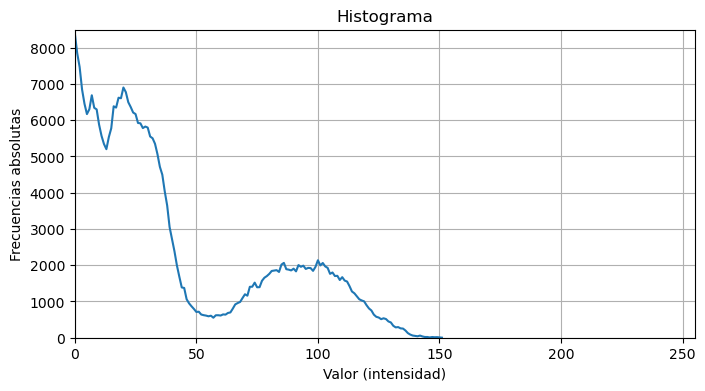

In [52]:
imagenGranos2 = np.copy(imagenFondoHomogeneo)

plt.figure(figsize=(8, 4))

img_hist, bins = exposure.histogram(imagenGranos2, normalize=False)
plt.plot(bins, img_hist)
plt.axis([0,255, 0, 1.01*img_hist.max()])
plt.title('Histograma')
plt.xlabel('Valor (intensidad)')
plt.ylabel('Frecuencias absolutas')
plt.grid()

Text(0.5, 1.0, 'Imagen con máscara')

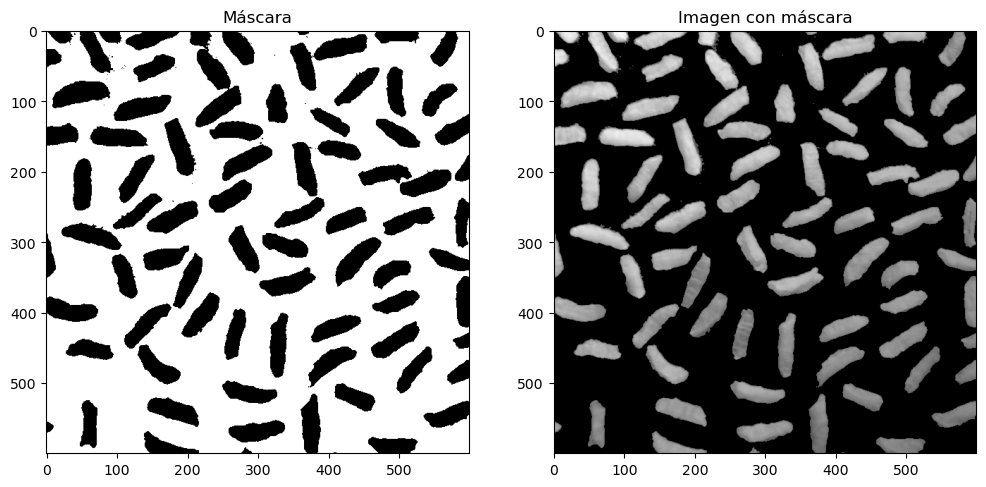

In [68]:
th = 50

mask = imagenGranos2 < th
imagenGranos2[mask] = 0

plt.figure(figsize=(12, 8))


plt.subplot(121)
plt.imshow(mask, cmap='gray')
plt.title('Máscara')

plt.subplot(122)
plt.imshow(imagenGranos2, cmap='gray')
plt.title('Imagen con máscara')

Haciendo pruebas, vemos como con un umbral de valor 50 el resultado que nos queda es muy bueno. Vamoa hacerlo ahora calculando el umbral de forma automática. Para ello usamos la función threshold_otsu de Skimage. Además, en este caso vamos a utilizar la máscara de forma invertida, para dar más variedad a los comandos.

In [61]:
from skimage.filters import threshold_otsu

57


Text(0.5, 1.0, 'Imagen con máscara')

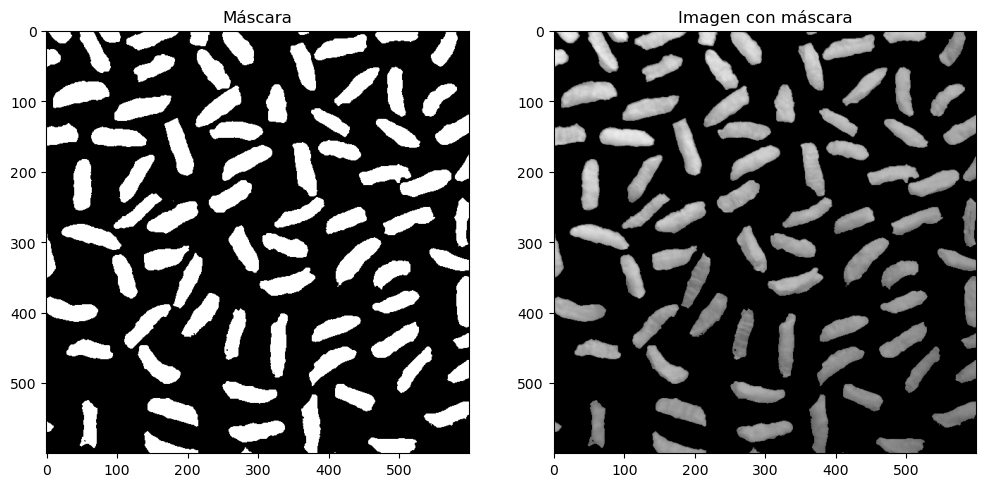

In [76]:
imagenGranos3 = np.copy(imagenFondoHomogeneo)

th = threshold_otsu(imagenGranos3)
print(th)

mask2 = imagenGranos3 < th
mask2N=np.logical_not(mask2)
imagenResultado = imagenGranos3*mask2N

plt.figure(figsize=(12, 8))


plt.subplot(121)
plt.imshow(mask2N, cmap='gray')
plt.title('Máscara')

plt.subplot(122)
plt.imshow(imagenResultado, cmap='gray')
plt.title('Imagen con máscara')

Como vemos, el resultado es muy parecido al que hemos obtenido a mano, el cual habíamos fijado el umbral a 50. En este caso, la función del umbral óptimo nos da 57, por ello nos queda el resultado muy parecido, pero de esta forma, no hemos perdido tiempo haciendo el prueba y error.